In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.autograd import Variable
import sys

def sign(num):
    check = Variable(torch.Tensor([0.0]).double().expand(num.size()))
    return torch.ge(num,check).double()

def accuracy(y_real, y_predicted):
    n = y_real.size()[0]
    return (y_predicted.data==y_real.data).sum()/n

def predict(x,w1,w2):
    return torch.ge(torch.sigmoid(x.mm(w1).mm(w2)),0.5).double()

In [16]:
images = np.load('data/images.npy')
labels = np.load('data/labels.npy')
flattened_image = images.reshape([len(images),-1])
flattened_image = (flattened_image - flattened_image.min())/(flattened_image.max() - flattened_image.min())
flattened_image = np.insert(flattened_image, 0, 1, axis=1)

apple_labels = labels
learning_rate = 0.01

apple_labels[labels == 0] = 10 
apple_labels[labels < 10] = 0
apple_labels[labels == 10] = 1
# np.unique(apple_labels)
np.min(flattened_image), np.max(flattened_image)


(0.0, 1.0)

In [17]:
n,m = flattened_image.shape
hidden_layers = 100
output_nodes = 1

X = Variable(torch.from_numpy(flattened_image)).double()
y = Variable(torch.from_numpy(apple_labels).view(-1,1)).double()

In [35]:
X_test = X[-5000:]
y_test = y[-5000:]

# shuffle first 45,000 so that after every epoch we don't overfit
# random = torch.randperm(45000)
# X_shuffled = X[random]
# y_shuffled = y[random]

X_shuffled = X[:45000]
y_shuffled = y[:45000]


X_train = X_shuffled[:40000]
X_dev = X_shuffled[-5000:]

y_train = y_shuffled[:40000]
y_dev = y_shuffled[-5000:]

n = 5000

In [41]:
loss_history = []
train_accuracy = []
dev_accuracy = []

test_set_accuracy = []
epoch_points_train = []
epoch_points_dev = []
print("Train | Dev")
for super in range(1):
    w1 = Variable((0.2*torch.randn(m,hidden_layers)).double(),requires_grad=True) # m x P
    w2 = Variable((0.2*torch.randn(hidden_layers,output_nodes)).double(),requires_grad=True) # P x output
    
    m1_ = Variable((torch.zeros((m, hidden_layers)).double()))
    v1 = Variable((torch.zeros((m, hidden_layers)).double()))
    
    m2_ = Variable((torch.zeros((hidden_layers, output_nodes)).double()))
    v2 = Variable((torch.zeros((hidden_layers, output_nodes)).double()))
    t = 0
    for iterations in range(1):
        for i in range(n):
            
            mid_layer = torch.sigmoid(X_train[i].view(1,-1).mm(w1))
            out_layer = torch.sigmoid(mid_layer.mm(w2))
            
            eps1, eps2 = 1e-2,1e2
            loss = (y_train[i] * (out_layer.clamp(eps1, eps2).log())) + \
                ((1-y_train[i]) * ((1-out_layer).clamp(eps1, eps2).log()))  
            loss.backward()
 
            lr1 = learning_rate * w1.grad.data
            lr2 = learning_rate * w2.grad.data
            
            w1.data = w1.data + lr1
            w2.data = w2.data + lr2
            
            w2.grad.data.zero_()
            w1.grad.data.zero_()
            

            if i%5000 == 0:
                # rand_train = torch.from_numpy(np.random.choice(40000, 1000, replace=False))
                # rand_dev = torch.from_numpy(np.random.choice(5000, 1000, replace=False))
                train_accuracy.append(accuracy(y_train[rand_train],predict(X_train[rand_train], w1, w2)))
                # dev_accuracy.append(accuracy(y_dev[rand_dev], X_dev[rand_dev].mm(w.t())))
                # dev_accuracy.append(accuracy(y_dev, predict(X_dev, w1, w2)))
       
    a=accuracy(y_train,predict(X_train, w1, w2))
    print(a)
    

Train | Dev
0.9478


In [16]:
test = Variable((torch.randn(m,hidden_layers)).double()) # m x P
test.sum(), test.data.sum()

(Variable containing:
 -364.8112
 [torch.DoubleTensor of size 1], -364.8112008362277)

In [ ]:
loss = (Y[i] * (sigmoid(X. W).clamp(eps1, eps2).log())) + ((1-Y[i]) * ((1-sigmoid(X. W)).clamp(eps1, eps2).log()))  


In [197]:
forward(X_test[0],w1,w2)

RuntimeError: matrices expected, got 1D, 2D tensors at /pytorch/torch/lib/TH/generic/THTensorMath.c:1288

IndexError: list index out of range

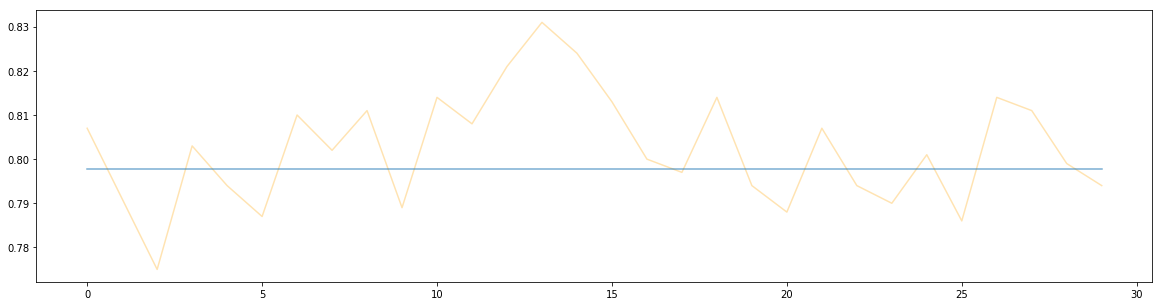

In [233]:
# Learning rate 0.001
# 0.973 0.9662 0.9696
# 0.962 0.9698 0.9728
# 0.969 0.9704 0.9746


# Learning rate 0.01
# 0.975 0.969 0.9742
# 0.99 0.9736 0.9786
# 0.986 0.977 0.9824
plt.figure(figsize=(20, 5))
plt1, = plt.plot(train_accuracy, label="Train accuracy",color='orange',alpha=0.3)
plt2, = plt.plot(dev_accuracy, label="Dev accuracy", alpha=0.6)

for i,val in enumerate(test_set_accuracy):
#     plt.scatter((i+1)*400,val,c='r',s=2000,zorder=-10)
    z = (i + 1)*400 - 1
    train_epoch = plt.scatter(z, train_accuracy[z], c='m',s=90,zorder=10,label="Train accuracy #epoch")
    test_epoch = plt.scatter(z, dev_accuracy[z], c='c',s=90,zorder=10,label="Test accuracy #epoch")
    
print("Best model at " + str(np.argmax(dev_accuracy)) + " with accuracy " + str(np.max(dev_accuracy)))
maximum_model = plt.scatter(np.argmax(dev_accuracy), dev_accuracy[np.argmax(dev_accuracy)], c='r',label='Highest Dev')
plt.legend(handles=[plt1, plt2,train_epoch,test_epoch,maximum_model])
print("Final accuracy " + str(accuracy(y_test,predict(X_test, w1,w2))))

In [189]:
loss_history = []
train_accuracy = []
dev_accuracy = []
#             m1_.data = b1 * m1_.data + (1 - b1  + ep) * w1.grad.data
#             m1_hat = m1_.data / (1 - (b1)**tp  + ep)
#             v1.data = b2 * v1.data + (1 - b2) * (w1.grad.data).pow(2)
#             v1_hat = v1.data / (1 - (b2)**(tp)  + ep)          
            
#             m2_.data = b1 * m2_.data + (1 - b1  + ep) * w2.grad.data
#             m2_hat = m2_.data / (1 - (b1)**tp  + ep)
#             v2.data = b2 * v2.data + (1 - b2) * (w2.grad.data).pow(2)
#             v2_hat = v2.data / (1 - (b2)**(tp)  + ep)

test_set_accuracy = []
epoch_points_train = []
epoch_points_dev = []
print("Train | Dev")
for super in range(1):
    w1 = Variable((0.2*torch.randn(m,hidden_layers)).double(),requires_grad=True) # m x P
    w2 = Variable((0.2*torch.randn(hidden_layers,output_nodes)).double(),requires_grad=True) # P x output
    
    m1_ = Variable((torch.zeros((m, hidden_layers)).double()))
    v1 = Variable((torch.zeros((m, hidden_layers)).double()))
    
    m2_ = Variable((torch.zeros((hidden_layers, output_nodes)).double()))
    v2 = Variable((torch.zeros((hidden_layers, output_nodes)).double()))
    
    t= 0
    
    for iterations in range(1):
        for i in range(10):
            t += 1
            tp = t*0.1
            mid_layer = X_train[i].view(1,-1).mm(w1).clamp(min=0)
            out_layer = torch.sigmoid(mid_layer.mm(w2))
            eps1, eps2 = 1e-2,1e2
            loss = (y_train[i] * (out_layer.clamp(eps1, eps2).log())) + \
                ((1-y_train[i]) * ((1-out_layer).clamp(eps1, eps2).log()))  
            loss.backward()
            
            
#             m1_.data = b1 * m1_.data + (1 - b1  + ep) * w1.grad.data
#             m1_hat = m1_.data / (1 - (b1)**tp  + ep)
#             v1.data = b2 * v1.data + (1 - b2) * (w1.grad.data).pow(2)
#             v1_hat = v1.data / (1 - (b2)**(tp)  + ep)          
            
#             m2_.data = b1 * m2_.data + (1 - b1  + ep) * w2.grad.data
#             m2_hat = m2_.data / (1 - (b1)**tp  + ep)
#             v2.data = b2 * v2.data + (1 - b2) * (w2.grad.data).pow(2)
#             v2_hat = v2.data / (1 - (b2)**(tp)  + ep)

            
#             w1.data += learning_rate * m1_hat / ((v1_hat).sqrt() + ep)
#             w2.data += learning_rate * m2_hat / ((v2_hat).sqrt() + ep)            

            
            w1.data += learning_rate * w1.grad.data
            w2.data += learning_rate * w2.grad.data
            
            w1.grad.data.zero_()
            w2.grad.data.zero_()
            

            if i%100 == 0:
                rand_train = torch.from_numpy(np.random.choice(40000, 1000, replace=False))
                # rand_dev = torch.from_numpy(np.random.choice(5000, 1000, replace=False))
                train_accuracy.append(accuracy(y_train[rand_train],predict(X_train[rand_train], w1, w2)))
                # dev_accuracy.append(accuracy(y_dev[rand_dev], X_dev[rand_dev].mm(w.t())))
                dev_accuracy.append(accuracy(y_dev, predict(X_dev, w1, w2)))
        hidden_layers
        test_set_accuracy.append(accuracy(y_test,predict(X_test, w1, w2)))
        epoch_points_train.append(train_accuracy[-1])
        epoch_points_dev.append(dev_accuracy[-1])

        print(epoch_points_train[-1], epoch_points_dev[-1], test_set_accuracy[-1])
        
    print("\n")
    

0.8008